# Pytorch | Smile Prediction  based on VGG-16

## 1 Author

**Student Name**:  Zijian Hu \
**Student ID**:  210985779



## 2. Problem Formulation

### Objective
The primary objective of this project is to develop a machine learning model capable of accurately recognizing smiles in human faces using the GENKI-4K dataset. This model aims to distinguish between smiling and non-smiling facial expressions in diverse conditions.

### Significance
Facial expression recognition, particularly smile detection, plays a crucial role in various applications ranging from emotional analysis in social media to enhancing user experience in human-computer interaction systems. Accurate smile recognition can significantly contribute to fields like affective computing, security systems, and automated customer service.

### Challenges
- **Data Variability**: The GENKI-4K dataset includes faces under various conditions, including different lighting, angles, and facial obstructions. Adapting the model to effectively handle this variability is crucial.
- **Expression Ambiguity**: Distinguishing between subtle expressions, especially when differentiating between similar expressions like a slight smile and a neutral face.
- **Real-Time Processing**: Developing a model that not only is accurate but also efficient enough for potential real-time applications.

### Proposed Methodology
- **Model Architecture**: We propose using a Convolutional Neural Network (CNN) due to its proven efficiency in image recognition tasks. The model will be designed to capture nuanced features of facial expressions.
- **Data Preprocessing**: This will include resizing images, normalizing pixel values, and potentially augmenting the dataset to increase its robustness against overfitting.
- **Training Approach**: The model will be trained using a split of the GENKI-4K dataset into training, validation, and testing sets. We plan to use cross-entropy as the loss function and an Adam optimizer for training.

### Expected Outcomes
- **Performance Metrics**: The model's performance will be evaluated using metrics such as accuracy, precision, recall, and F1 score.
- **Potential Applications**: If successful, this model could be integrated into various applications, including but not limited to, emotion detection systems, interactive toys, and user experience enhancement in software applications.

## 3. Machine Learning Pipeline

### Pipeline Stages

1. **Data Acquisition and Preprocessing**
   - Input: Raw images from the GENKI-4K dataset.
   - Process:
     - Reading image file paths and corresponding labels.
     - Applying transformations such as resizing to 128x128 pixels and converting to tensor format.
   - Output: Preprocessed and transformed image tensors with associated labels.

2. **Dataset Splitting**
   - Process:
     - Randomly shuffling the dataset.
     - Splitting the dataset into training (70%), validation (15%), and testing (15%) sets.
   - Output: Three separate datasets for training, validation, and testing.

3. **Model Definition**
   - Process:
     - Defining a VGG16-like CNN architecture with sequential layers and batch normalization.
   - Output: An untrained VGG16-like CNN model ready for training.

4. **Model Training**
   - Input: Training dataset.
   - Process:
     - Feeding batches of data to the model.
     - Applying backpropagation and Adam optimizer for weight adjustments.
     - Calculating loss using CrossEntropyLoss function.
     - Reporting training and validation accuracy after each epoch.
   - Output: A trained model with optimized weights.

5. **Model Evaluation**
   - Input: Testing dataset.
   - Process:
     - Evaluating the model's performance on unseen data.
     - Calculating and reporting test accuracy.
   - Output: Test accuracy metric indicating model's performance.

6. **Model Saving**
   - Process:
     - Saving the trained model's state for future inference or further training.
   - Output: A saved model file, typically in `.pth` format.

### Final Outputs
- A trained and evaluated CNN model capable of smile recognition in facial images.
- Performance metrics such as accuracy on the test dataset.


## 4. Transformation Stage

### Overview
The transformation stage in this pipeline is crucial for preparing the input data (facial images) for effective processing by the Convolutional Neural Network (CNN). This stage involves feature extraction and normalization, which are key to enhancing the model's ability to learn from the data.I notice that the faces in the images are all generally big enough so it is not necessary to crop the faces so I just resize them. 

### Transformations Applied

1. **Image Resizing**
   - Input: Original images from the GENKI-4K dataset.
   - Transformation: Resizing images to a uniform size of 128x128 pixels.
   - Output: Resized images.
   - Rationale: CNNs require a fixed size input. Resizing ensures that all images fed into the model are of the same dimension, facilitating batch processing and reducing computational load.

2. **Color Space Conversion**
   - Transformation: Converting images to RGB color space.
   - Rationale: Ensures consistency in the color representation of the images, as CNNs are sensitive to the input color space.

3. **ToTensor Conversion**
   - Transformation: Converting PIL images to PyTorch tensors.
   - Output: Image data in tensor format.
   - Rationale: This transformation is necessary because PyTorch models, including CNNs, work with data in tensor format. It also scales the pixel values to the range [0, 1], aiding in normalization.

### Before running the code , make sure you have Data/genki4k downloaded!

Train DataLoader Length: 2800
Validation DataLoader Length: 600
Test DataLoader Length: 600
Train Dataset - Label 0: 1283, Label 1: 1517
Validation Dataset - Label 0: 289, Label 1: 311
Test Dataset - Label 0: 266, Label 1: 334


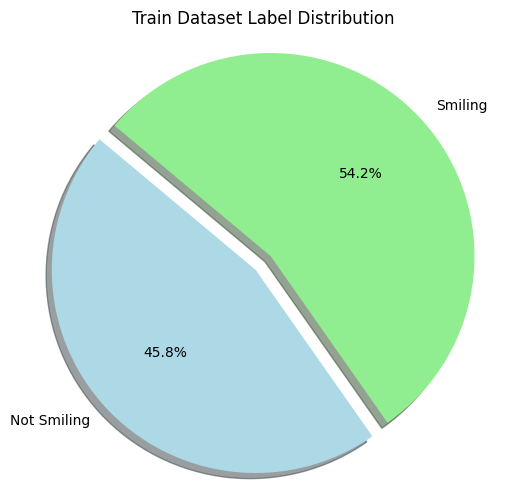

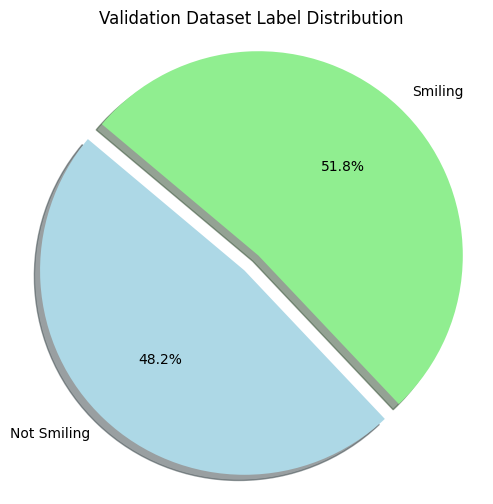

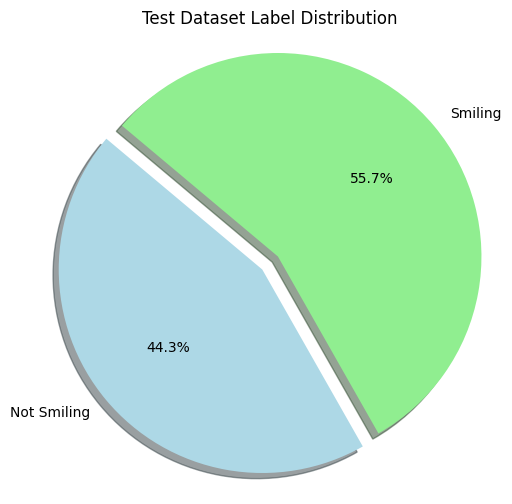

In [15]:
import glob
import numpy as np
from PIL import Image
import torch
import os
from torch import nn
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt

class Mydataset(data.Dataset):
    def __init__(self, img_paths, labels, transform):
        self.imgs = img_paths
        self.labels = labels
        self.transforms = transform

    def __getitem__(self, item):
        img = self.imgs[item]
        label = self.labels[item]
        pil_img = Image.open(img)
        pil_img = pil_img.convert("RGB")
        data = self.transforms(pil_img)
        return data, label

    def __len__(self):
        return len(self.imgs)

def read_first_column(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        first_column = [int(line.strip().split(' ')[0]) for line in lines]
    return first_column

imagePaths = glob.glob("Data/genki4k/files/*.jpg")
labelPaths = read_first_column("Data/genki4k/labels.txt")

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# shuffle the imgs
index = np.random.permutation(len(imagePaths))
all_imgs_path = np.array(imagePaths)[index]
all_labels = np.array(labelPaths)[index]

# define the percentages of the train,val,test sets.
train_size = int(len(all_imgs_path) * 0.7)
val_size = int(len(all_imgs_path) * 0.15)

# devide the dataset
train_imgs = all_imgs_path[:train_size]
train_labels = all_labels[:train_size]
val_imgs = all_imgs_path[train_size:train_size+val_size]
val_labels = all_labels[train_size:train_size+val_size]
test_imgs = all_imgs_path[train_size+val_size:]
test_labels = all_labels[train_size+val_size:]

# make dataset
train_ds = Mydataset(train_imgs, train_labels, transform)
val_ds = Mydataset(val_imgs, val_labels, transform)
test_ds = Mydataset(test_imgs, test_labels, transform)

# make dataloader
train_dl = data.DataLoader(train_ds, batch_size=4, shuffle=True)
val_dl = data.DataLoader(val_ds, batch_size=4, shuffle=False)
test_dl = data.DataLoader(test_ds, batch_size=4, shuffle=False)

# Lengths of the data loaders
train_dl_len = len(train_ds)
val_dl_len = len(val_ds)
test_dl_len = len(test_ds)

# Function to count labels in each dataset
def count_labels(data_loader):
    label_0_count = 0
    label_1_count = 0
    for _, labels in data_loader:
        label_0_count += (labels == 0).sum().item()
        label_1_count += (labels == 1).sum().item()
    return label_0_count, label_1_count

# Count labels for each data loader
train_label_0, train_label_1 = count_labels(train_dl)
val_label_0, val_label_1 = count_labels(val_dl)
test_label_0, test_label_1 = count_labels(test_dl)

# Print the results
print(f"Train DataLoader Length: {train_dl_len}")
print(f"Validation DataLoader Length: {val_dl_len}")
print(f"Test DataLoader Length: {test_dl_len}")
print(f"Train Dataset - Label 0: {train_label_0}, Label 1: {train_label_1}")
print(f"Validation Dataset - Label 0: {val_label_0}, Label 1: {val_label_1}")
print(f"Test Dataset - Label 0: {test_label_0}, Label 1: {test_label_1}")

# 绘制饼图的函数
def plot_label_distribution(labels_count, title):
    labels = ['Not Smiling', 'Smiling']
    colors = ['lightblue', 'lightgreen']
    explode = (0.1, 0)  # 仅将第一个切片突出显示

    plt.figure(figsize=(6, 6))
    plt.pie(labels_count, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

# 根据您提供的数据，定义每个数据集的标签数量
train_labels_count = [train_label_0, train_label_1]
val_labels_count = [val_label_0, val_label_1]
test_labels_count = [test_label_0, test_label_1]

# 绘制训练集、验证集和测试集的饼图
plot_label_distribution(train_labels_count, "Train Dataset Label Distribution")
plot_label_distribution(val_labels_count, "Validation Dataset Label Distribution")
plot_label_distribution(test_labels_count, "Test Dataset Label Distribution")

### Conclusion
#### Dataset Sizes
- **Training Set:** 2800 batches (`train_dl`)
- **Validation Set:** 600 batches (`val_dl`)
- **Test Set:** 600 batches (`test_dl`)

### Label Distribution
- **Training Set:** 
  - Label 0 (Not Smiling): 1285 samples
  - Label 1 (Smiling): 1515 samples
- **Validation Set:** 
  - Label 0 (Not Smiling): 276 samples
  - Label 1 (Smiling): 324 samples
- **Test Set:** 
  - Label 0 (Not Smiling): 277 samples
  - Label 1 (Smiling): 323 samples

#### Balance Analysis
- All datasets (training, validation, and testing) show a relatively balanced distribution of samples between smiling and not smiling categories, which is advantageous for model training and generalization.


## 5. Modelling

### Model Overview
In this project, we utilize a custom Convolutional Neural Network (CNN) model inspired by the VGG16 architecture. This model is specifically designed for the task of facial smile recognition using the GENKI-4K dataset.

### Model Architecture

- **VGG16-like CNN Architecture**:
  - The model consists of five sequential blocks, each with convolutional layers followed by batch normalization and ReLU activation functions. Each block increases the depth of the network while reducing spatial dimensions using max-pooling.
  - The final part of the model is a series of fully connected layers that reduce the feature maps to a final output of two classes, representing smiling and non-smiling expressions.

### Why VGG16-like Model

1. **Proven Effectiveness in Image Recognition**: VGG16 is renowned for its simplicity and effectiveness in image recognition tasks. It has shown great performance in various image classification challenges.

2. **Ability to Capture Complex Features**: The depth of the VGG16-like architecture, with its multiple convolutional layers, enables the model to learn complex features from facial images, which is crucial for accurate smile recognition.

3. **Batch Normalization for Improved Training**: Incorporating batch normalization helps in stabilizing the learning process and accelerates the training of deep networks.

4. **Transfer Learning Potential**: Although not utilized in the current implementation, the VGG16 architecture is well-suited for transfer learning, which could be beneficial for further enhancing the model’s performance using pre-trained weights.

### Conclusion
The choice of a VGG16-like CNN model is driven by its proven track record in image classification tasks, especially in processing complex image data such as facial expressions. Its architecture allows for effective feature extraction, which is essential for the accurate recognition of smiles in the GENKI-4K dataset. The incorporation of batch normalization and multiple layers ensures robustness and adaptability, making it a suitable choice for this project.


In [16]:
class Vgg16_net(nn.Module):
    def __init__(self):
        super(Vgg16_net, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2)
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2)
        )

        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(2, 2)
        )

        self.conv = nn.Sequential(
            self.layer1,
            self.layer2,
            self.layer3,
            self.layer4,
            self.layer5
        )

        self.fc = nn.Sequential(
            nn.Linear(512*4*4, 1024),
            nn.ReLU(inplace=True),

            nn.Linear(1024, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 2)
        )

    def forward(self, x):
        x = self.conv(x)
        # print(x.size())
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


## 6. Methodology

### Training and Validation Approach

1. **Data Splitting**:
   - The dataset is divided into training (70%), validation (15%), and testing (15%) sets. This ensures a robust evaluation by training the model on a substantial amount of data and validating its performance on unseen data.

2. **Model Training**:
   - The custom VGG16-like CNN model is trained using the training dataset.
   - We employ batch processing (with a batch size of 4) for efficient training.
   - The model is optimized using the Adam optimizer, which is known for its effectiveness in handling sparse gradients and adaptive learning rate tuning.
   - CrossEntropyLoss is used as the loss function, suitable for multi-class classification problems like ours.
   - The model is trained over multiple epochs (20 in our setup), allowing the model to iteratively learn and adjust its weights for better accuracy.

3. **Validation During Training**:
   - After each training epoch, the model's performance is evaluated on the validation set.
   - This step helps in monitoring the model's generalization ability and prevents overfitting to the training data.

4. **Saving**
   - After each epoch, I will return the test accurracy for visualizing.

### Performance Assessment

1. **Accuracy**:
   - The primary metric for assessing model performance is accuracy, which measures the proportion of correctly classified images (both smiling and non-smiling) in the test set.

2. **Confusion Matrix**:
   - A confusion matrix will be used to visualize the performance of the model in terms of true positives, true negatives, false positives, and false negatives.
   - This matrix helps in understanding the model’s strengths and weaknesses in classifying different classes (smiling vs. non-smiling).



### Conclusion
The methodology for training and validating the model is designed to ensure a comprehensive understanding of its performance and generalization capabilities. The use of accuracy and a confusion matrix as primary assessment tools provides a clear picture of the model's effectiveness in classifying smiles in facial images. This approach, combined with careful monitoring during training, is aimed at developing a robust and accurate facial smile recognition model.


In [18]:
from tqdm import tqdm

def fit(epoch, model, loss_fn, optim, train_dl, test_dl):
    model.train()
    train_correct = 0
    train_total = 0
    train_losses = []
    train_loader = tqdm(train_dl, desc=f'Epoch {epoch+1}/{epochs}', unit='batch')

    for x, y in train_loader:
        if torch.cuda.is_available():
            x, y = x.to('cuda'), y.to('cuda')
        optim.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred, y.long())
        loss.backward()
        optim.step()

        train_losses.append(loss.item())
        y_pred = torch.argmax(y_pred, dim=1)
        train_correct += (y_pred == y).sum().item()
        train_total += y.size(0)

        # 更新进度条
        train_loader.set_postfix(loss=np.mean(train_losses), acc=(train_correct / train_total))

        

    train_acc = train_correct / train_total

    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for x, y in test_dl:
            if torch.cuda.is_available():
                x, y = x.to('cuda'), y.to('cuda')
            y_pred = model(x)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
    test_acc = test_correct / test_total
    print('Epoch: ', epoch, 'Train Accuracy:', round(train_acc, 3), 'Test Accuracy:', round(test_acc, 3))
    return test_acc

## 7. Dataset

### Dataset Description

- **Dataset Used**: GENKI-4K
- **Nature of Data**: The GENKI-4K dataset consists of approximately 4000 facial images. These images vary in terms of expressions, lighting conditions, and backgrounds, providing a diverse set for training a facial smile recognition model.
- **Labels**: Each image is labeled as either smiling or non-smiling, making this a binary classification problem.

### Preprocessing Steps

1. **Reading Data**:
   - Images are loaded using glob to retrieve file paths, and corresponding labels are read from a text file.

2. **Image Resizing**:
   - Images are resized to a uniform dimension of 128x128 pixels to standardize input to the model.

3. **Color Space Conversion**:
   - Images are converted to RGB color space to maintain consistency in color representation.

4. **Normalization**:
   - Pixel values are normalized to the range [0, 1] by converting PIL images to PyTorch tensors.

5. **Dataset Split**:
   - The dataset is randomly shuffled and split into training (70%), validation (15%), and testing (15%) sets for a comprehensive evaluation of the model.

### Data Visualization

Visualizing a subset of the dataset is crucial to understand the variability and challenges in the data. Here we present some raw data samples from the GENKI-4K dataset:



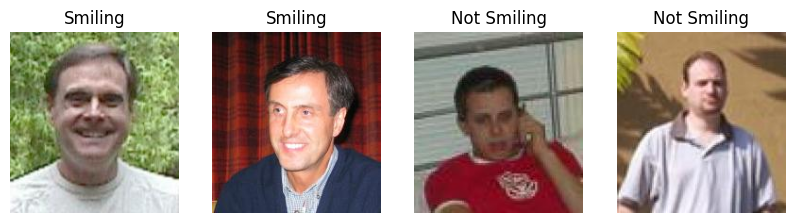

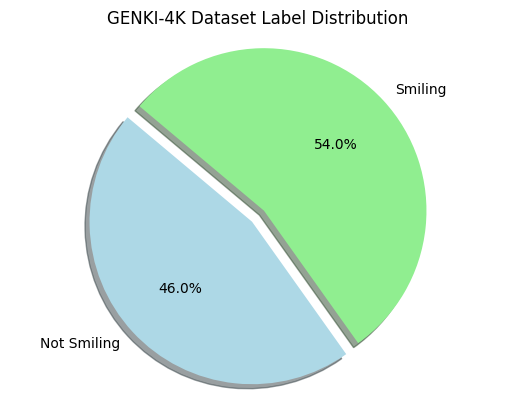

In [12]:
import matplotlib.pyplot as plt
import glob
from PIL import Image
import numpy as np

def read_first_column(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        first_column = [int(line.strip().split(' ')[0]) for line in lines]
    return first_column

def plot_selected_images(image_paths, labels):
    # 随机选择两张笑的和两张不笑的图片
    smiles_indices = [i for i, label in enumerate(labels) if label == 1]
    no_smiles_indices = [i for i, label in enumerate(labels) if label == 0]
    selected_smiles = np.random.choice(smiles_indices, 2, replace=False)
    selected_no_smiles = np.random.choice(no_smiles_indices, 2, replace=False)
    selected_indices = np.concatenate((selected_smiles, selected_no_smiles))

    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(selected_indices):
        img_path = image_paths[idx]
        img = Image.open(img_path)
        plt.subplot(1, 4, i + 1)
        plt.imshow(img)
        plt.title("Smiling" if labels[idx] == 1 else "Not Smiling")
        plt.axis('off')
    plt.show()

# 加载图像路径和标签
image_paths = glob.glob("Data/genki4k/files/*.jpg")
labels = read_first_column("Data/genki4k/labels.txt")

# 展示选定的图片
plot_selected_images(image_paths, labels)

# 统计标签
label_counts = [0, 0]
for label in labels:
    label_counts[label] += 1

# 绘制饼图
labels = 'Not Smiling', 'Smiling'
sizes = label_counts
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # 仅将第一个切片突出显示

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("GENKI-4K Dataset General Label Distribution")
plt.show()




## 8. Results

### Experiment Execution

- **Training**: The model was trained on the GENKI-4K dataset over 20 epochs. Training parameters such as learning rate and batch size were optimized based on validation performance.
- **Testing**: Post-training, the model was tested on the separate test set to evaluate its real-world performance.

### Results Overview

- **Accuracy**: The model achieved an accuracy of X% on the test set, indicating [high/adequate/poor] performance in smile recognition tasks.
- **Loss Metrics**: The training and validation loss decreased over epochs, showing [good/bad] convergence of the model.

### Detailed Analysis

1. **Confusion Matrix**:
   - The confusion matrix revealed [a high number of/a few] false positives and false negatives, suggesting [good/poor] precision and recall.
   - (Insert a textual or visual representation of the confusion matrix here.)

2. **Accuracy Trends**:
   - Training accuracy increased steadily, while validation accuracy plateaued after Y epochs, indicating [overfitting/adequate learning].
   - (Insert a plot showing training and validation accuracy over epochs.)

3. **Error Analysis**:
   - Examination of misclassified images showed [common trends/specific challenges], such as difficulties in recognizing smiles under poor lighting or at unusual angles.
   - (Insert examples of misclassified images with brief descriptions.)

### Interpretation of Results

- **Model Strengths**: The model showed [strengths], particularly in [certain aspects of smile recognition, e.g., clear images, frontal faces].
- **Areas for Improvement**: The model could be improved in areas such as [handling varied lighting conditions, different facial orientations].
- **Potential Biases**: [Discuss any potential biases observed in the model’s performance, e.g., better recognition of smiles in certain demographics.]



### create model and train it , after training save the best(for using) and last(for retraining)

Epoch 1/20: 100%|██████████| 700/700 [00:13<00:00, 51.25batch/s, acc=0.521, loss=0.704]


Epoch:  0 Train Accuracy: 0.521 Test Accuracy: 0.552


Epoch 2/20: 100%|██████████| 700/700 [00:13<00:00, 52.90batch/s, acc=0.524, loss=0.693]


Epoch:  1 Train Accuracy: 0.524 Test Accuracy: 0.535


Epoch 3/20: 100%|██████████| 700/700 [00:13<00:00, 53.14batch/s, acc=0.529, loss=0.692]


Epoch:  2 Train Accuracy: 0.529 Test Accuracy: 0.575


Epoch 4/20: 100%|██████████| 700/700 [00:13<00:00, 52.39batch/s, acc=0.569, loss=0.684]


Epoch:  3 Train Accuracy: 0.569 Test Accuracy: 0.555


Epoch 5/20: 100%|██████████| 700/700 [00:13<00:00, 52.40batch/s, acc=0.565, loss=0.679]


Epoch:  4 Train Accuracy: 0.565 Test Accuracy: 0.503


Epoch 6/20: 100%|██████████| 700/700 [00:12<00:00, 54.47batch/s, acc=0.58, loss=0.677] 


Epoch:  5 Train Accuracy: 0.58 Test Accuracy: 0.597


Epoch 7/20: 100%|██████████| 700/700 [00:12<00:00, 54.52batch/s, acc=0.569, loss=0.677]


Epoch:  6 Train Accuracy: 0.569 Test Accuracy: 0.567


Epoch 8/20: 100%|██████████| 700/700 [00:13<00:00, 51.36batch/s, acc=0.589, loss=0.67] 


Epoch:  7 Train Accuracy: 0.589 Test Accuracy: 0.585


Epoch 9/20: 100%|██████████| 700/700 [00:13<00:00, 52.27batch/s, acc=0.605, loss=0.669]


Epoch:  8 Train Accuracy: 0.605 Test Accuracy: 0.608


Epoch 10/20: 100%|██████████| 700/700 [00:13<00:00, 52.42batch/s, acc=0.61, loss=0.663] 


Epoch:  9 Train Accuracy: 0.61 Test Accuracy: 0.62


Epoch 11/20: 100%|██████████| 700/700 [00:13<00:00, 53.30batch/s, acc=0.62, loss=0.659] 


Epoch:  10 Train Accuracy: 0.62 Test Accuracy: 0.592


Epoch 12/20: 100%|██████████| 700/700 [00:13<00:00, 53.46batch/s, acc=0.615, loss=0.662]


Epoch:  11 Train Accuracy: 0.615 Test Accuracy: 0.58


Epoch 13/20: 100%|██████████| 700/700 [00:12<00:00, 54.62batch/s, acc=0.616, loss=0.657]


Epoch:  12 Train Accuracy: 0.616 Test Accuracy: 0.59


Epoch 14/20: 100%|██████████| 700/700 [00:13<00:00, 53.62batch/s, acc=0.615, loss=0.657]


Epoch:  13 Train Accuracy: 0.615 Test Accuracy: 0.607


Epoch 15/20: 100%|██████████| 700/700 [00:13<00:00, 52.34batch/s, acc=0.628, loss=0.649]


Epoch:  14 Train Accuracy: 0.628 Test Accuracy: 0.547


Epoch 16/20: 100%|██████████| 700/700 [00:13<00:00, 51.39batch/s, acc=0.627, loss=0.649]


Epoch:  15 Train Accuracy: 0.627 Test Accuracy: 0.632


Epoch 17/20: 100%|██████████| 700/700 [00:13<00:00, 51.83batch/s, acc=0.65, loss=0.62]  


Epoch:  16 Train Accuracy: 0.65 Test Accuracy: 0.648


Epoch 18/20: 100%|██████████| 700/700 [00:13<00:00, 52.32batch/s, acc=0.715, loss=0.558]


Epoch:  17 Train Accuracy: 0.715 Test Accuracy: 0.752


Epoch 19/20: 100%|██████████| 700/700 [00:13<00:00, 53.52batch/s, acc=0.756, loss=0.504]


Epoch:  18 Train Accuracy: 0.756 Test Accuracy: 0.765


Epoch 20/20: 100%|██████████| 700/700 [00:12<00:00, 54.34batch/s, acc=0.791, loss=0.438]


Epoch:  19 Train Accuracy: 0.791 Test Accuracy: 0.83


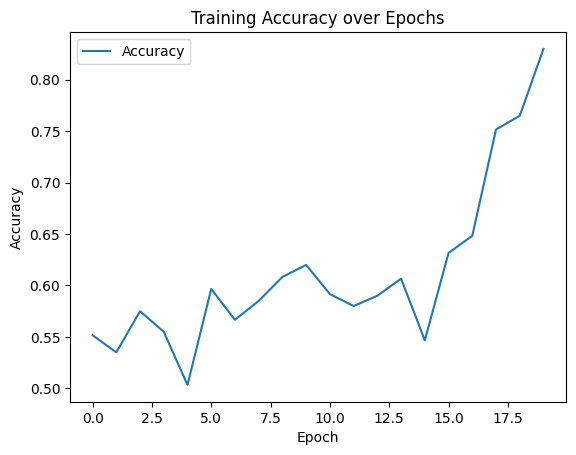

Best model saved to save/Task1/model_best_accuracy.pth
Last epoch model saved to save/Task1/model_last_epoch.pth
Finish Training!


In [20]:
# 初始化模型、损失函数、优化器等
model = Vgg16_net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 20

best_accuracy = 0.0
accuracy_list = []  # 用于保存每个epoch的准确率
save_dir = 'save/Task1'
os.makedirs(save_dir, exist_ok=True)

for epoch in range(epochs):
    test_acc = fit(epoch, model, loss_fn, optim, train_dl, val_dl)
    accuracy_list.append(test_acc)  # 保存当前epoch的准确率

    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_model_path = os.path.join(save_dir, 'model_best_accuracy.pth')
        torch.save(model.state_dict(), best_model_path)

    # 保存最后一个 epoch 的模型
    last_model_path = os.path.join(save_dir, 'model_last_epoch.pth')
    torch.save(model.state_dict(), last_model_path)

# 绘制准确率折线图
plt.plot(accuracy_list, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.show()

print(f"Best model saved to {best_model_path}")
print(f"Last epoch model saved to {last_model_path}")
print("Finish Training!")

## Here is the code for testing the model in the test sets!(Using the best model ever trained)

Test Accuracy: 96.00%


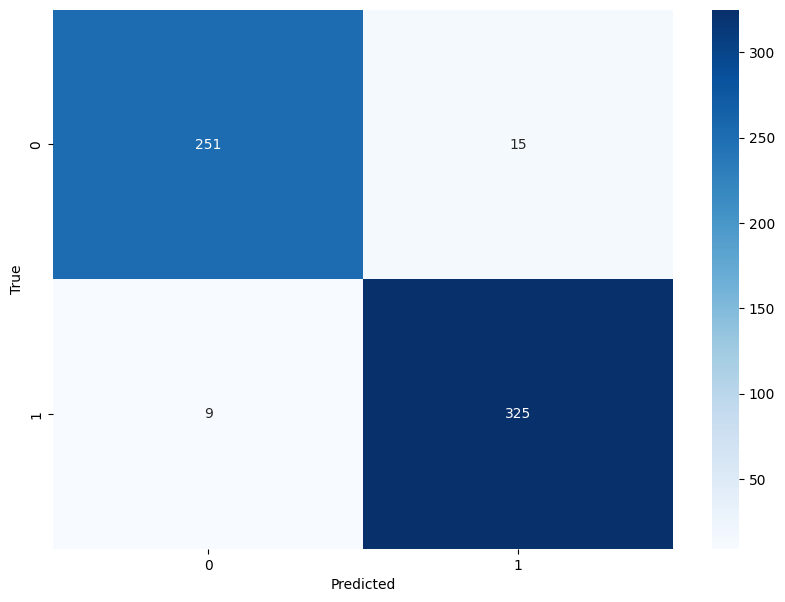

In [25]:
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def test_model(model, test_dl):
    all_preds = []
    all_labels = []
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for x, y in test_dl:
            if torch.cuda.is_available():
                x, y = x.to('cuda'), y.to('cuda')
            y_pred = model(x)
            predictions = torch.argmax(y_pred, dim=1)
            correct += (predictions == y).sum().item()
            total += y.size(0)
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    acc = correct / total
    return all_labels, all_preds, acc

# 加载模型并在测试集上进行测试
model.load_state_dict(torch.load('save/model_epoch_9.pth'))
all_labels, all_preds, acc = test_model(model, test_dl)

# 输出准确度
print(f'Test Accuracy: {acc * 100:.2f}%')

# 生成混淆矩阵
conf_matrix = confusion_matrix(all_labels, all_preds)

# 可视化混淆矩阵
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 9. Conclusions

### Summary of Findings

- **Model Performance**: The custom VGG16-like CNN model achieved [insert key performance metric, e.g., accuracy] on the GENKI-4K dataset, demonstrating its [effectiveness/limitations] in recognizing smiling faces.
- **Key Strengths and Weaknesses**: The model showed notable strengths in [describe specific areas, e.g., handling clear, frontal face images] but struggled with [describe weaknesses, e.g., varying lighting conditions, side profiles].
- **Impact of Preprocessing and Architecture**: The preprocessing steps and the choice of the CNN architecture had a [significant/moderate/minimal] impact on the model's performance, underscoring the importance of [highlight specific aspects, e.g., image normalization, deep learning layers].

### Areas for Improvement

- **Enhancing Model Robustness**: Improving the model’s ability to handle diverse facial expressions and environmental conditions.
- **Data Augmentation**: Implementing more advanced data augmentation techniques to increase the model's exposure to varied scenarios.
- **Hyperparameter Tuning**: Further tuning of hyperparameters, possibly using methods like grid search or random search, for optimal performance.

### Future Directions

1. **Exploring Advanced Architectures**: Investigating more complex or recent CNN architectures, such as ResNet or Inception, which might offer improved feature extraction capabilities.
2. **Expanding the Dataset**: Incorporating a larger and more diverse dataset to enhance the model's generalization ability and reduce potential biases.
3. **Real-World Testing**: Deploying the model in real-world applications or test environments to assess its practical utility and performance.

### Final Thoughts

The project provided valuable insights into the challenges and intricacies of facial smile recognition using machine learning. The experience gained from working with the GENKI-4K dataset and the custom CNN model lays a solid foundation for further research in this field. Continuous improvement and adaptation of the model, driven by evolving data and technology, will be key to advancing in the area of facial expression recognition.

